# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab as pl
import seaborn as sns
import math
import statsmodels.api as sm
sns.set()


df = pd.read_csv('human_body_temperature.csv')

### Inspect Data for any obvious observations

In [39]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [40]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [41]:
df['gender'].describe()

count     130
unique      2
top         F
freq       65
Name: gender, dtype: object

## Is the sample size large? Are the observations independent?
* Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    * The mean of the observed body temperature would provide for a normal curve as we can see in te distribution plot allowing us to ascertain that the observations are indeed independent 
    * Sample size is 130 with 65 per each gender

In [43]:
temperature = df['temperature']

In [44]:
# Verify sample populaiton mean

population_temperature_mean= temperature.mean()
print (population_temperature_mean)

# Generate random sample to compare with sample

np.random.seed(42)
sample_temperature = np.random.choice(temperature, 500) 
print ((sample_temperature.mean()))

population_temperature_mean - sample_temperature.mean()

98.24923076923078
98.3108


-0.061569230769208616

*  We can see that the difference of means between our random sample and original sample is approx 0.06 which is not significant enough to not consider our sample as inaccurate in terms of representing the population

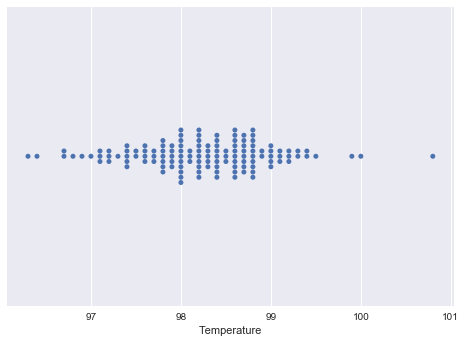

In [45]:
_ = sns.swarmplot(x= temperature, data=df)
_= plt.xlabel('Temperature')
plt.show()

* Swarmplot observations show a good density between 98 and 99 degrees
* There are some observable outliers which should be noted

* The margin of error being low tells us that our 

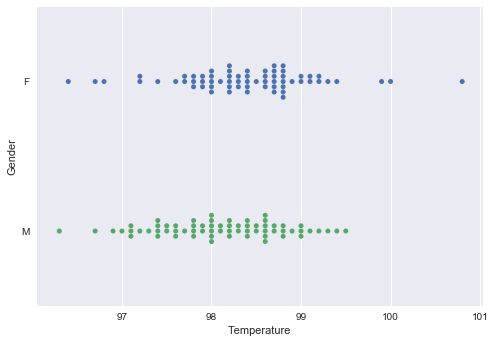

In [58]:
_ = sns.swarmplot(x= temperature, y='gender', data=df)
_= plt.xlabel('Temperature')
_= plt.ylabel('Gender')
plt.show()

* Investigaitng the outliers we can see that there is a difference between gender
* Observing the temperature by gender we can see that males have a slightly lower temperature than the females in the sample 
* The very high temperature observations seem to be from the females and the low outliers are generated by both male and females observations 

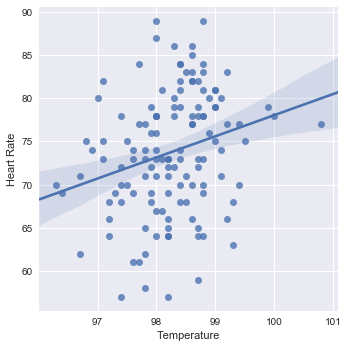

In [57]:
# Linear regression observation against heart rate

_= sns.lmplot(x= 'temperature', y='heart_rate', data=df)
_= plt.xlabel('Temperature')
_= plt.ylabel('Heart Rate')
plt.show()

*  The correlation of temperature to heart rate shows us that there is no uniformity of heart rate and temperature
*  Using the generated correlation line to assign an observation we can see that as heart rate increases temperature rises
*  We can also observe that the heart rate is not an ideal indicator of temperature

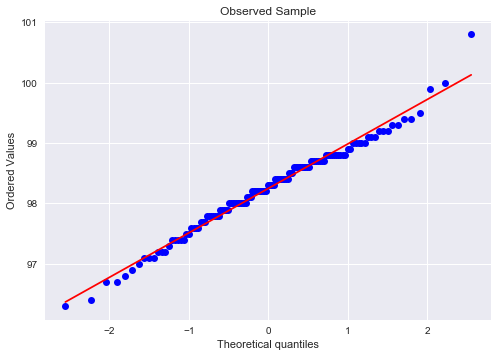

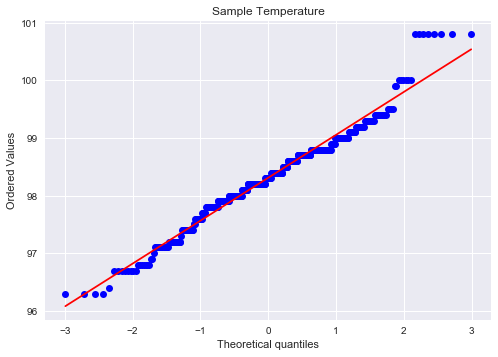

In [56]:
# Quantile plot
_= stats.probplot(temperature, dist="norm", plot=pl)
_= plt.title('Observed Sample')
plt.show()

_= stats.probplot(sample_temperature, dist="norm", plot=pl)
_= plt.title('Sample Temperature')
plt.show()

* From quantile plot we can see that both sample population and observed populaitons display the strong uniform distribution as they both primarily correlate with normal distribution line
* Few outliers are observed beyond 100 but otherwise there is a nice uniform distribution which makes sense given that the temperatures of the samples are within a specific range overall

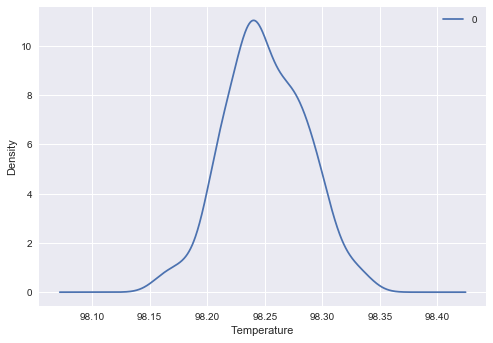

In [53]:
np.random.seed(42)

point_estimates = []         

for x in range(200):         
    sample = np.random.choice(a= temperature, size=500)
    point_estimates.append(sample.mean())
    
_= pd.DataFrame(point_estimates).plot(kind="density") 
_= plt.xlabel('Temperature')
plt.show()

In [54]:
n_data= len(temperature)
n_bins= np.sqrt(n_data)
n_bins= int(n_bins)

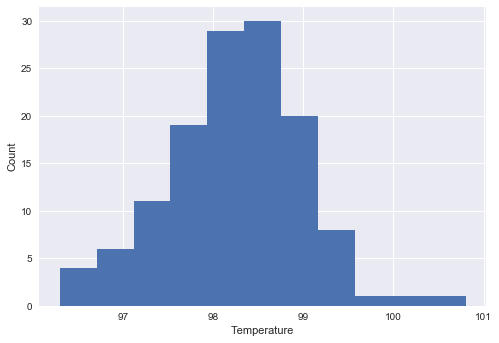

In [55]:
_= plt.hist(temperature, bins= n_bins)
_= plt.xlabel('Temperature')
_= plt.ylabel('Count')
plt.show()

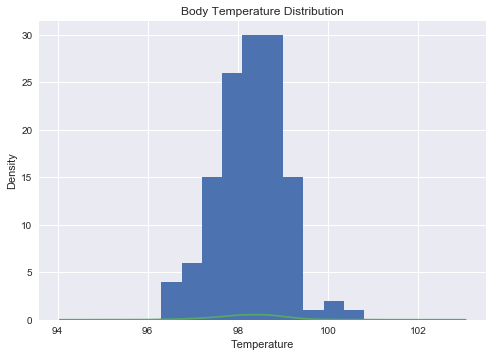

In [50]:
_= temperature.plot(kind='hist', title= 'Body Temperature Distribution')
_= temperature.plot(kind= 'kde')
_= plt.xlabel('Temperature')
plt.show()      

## Is the distribution of body temperatures normal?
* Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    * CLT would apply to this dataset as the mean temperatures of the population will follow a normal distribution as they are within a predictable range of temperatures
    * This sample is indeed representative of the populaiton because the observation are independent
    * We can see that the distribution of the temperatures of the population is quite normal and with very minor curve abiguities
    * We can also see that the curve of the random sample also reflects approximately identical representations
    * We can also observe the ideal normal curve over the kde curve and see that there is little to no difference meaning that the popultation reflects a normal distribution

In [ ]:
temp = np.random.gamma(98.3108, size=500)
_= sns.distplot(temp, kde=True, fit=stats.gamma)
_= plt.xlabel('Temperature')
_= plt.ylabel('Density')
_= plt.title('Random Sample')
_= plt.legend(('Normal', 'Observed'))
plt.show()


_= sns.distplot(temperature, kde=True, fit=stats.gamma)
_= plt.xlabel('Temperature')
_= plt.ylabel('Density')
_= plt.title('Observed Population')
_= plt.legend(('Normal', 'Observed'))
plt.show()

## Is the sample size large? Are the observations independent?
* From the observations above we can see that the observations are independent and thusly large enough to satisfy our analysis and hypothesis formulations and judgements
* Both the random sample and original sample show similar distributions that are very close to the normal ideal and thusly satisfy the CLT requirement

In [ ]:
def ecdf(df):
    
    # Number of data points: n
    n = len(df)

    # x-data for the ECDF: x
    x = np.sort(df)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


In [ ]:
x_vers, y_vers = ecdf(temperature)

# Generate plot
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('Temperature')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

## Is there a significant difference between males and females in normal temperature?
* What test did you use and why?
    * Comparison of means between temperatures by gender shows that females have a slightly higher average temperature as well as heart rate (which would also help to support wy their temperature is higher) 
* Write a story with your conclusion in the context of the original problem
    * In 1868 Carl Wunderlich established the mean body temperature as 98.6 degrees F which may have been true at the time as more people were inclined in physical labor thus maintaining a higher heart rate to induce a slightly higher mean. There may be other factors that impact the observed mean that we can not determine from this data such as sample size, gender sample size, women who may have been pregnant, people who may have had ailments or weaknesses and other such discrepancies that may impact the mean. Also since not all bodies are quite the same the mean should have been recorded as a range and separated by gender for accuracy. Per each gender a range of normal temperatures should be recorded as normal body temperature.

In [46]:
# Assign variable for each gender from dataset 
female = df[df['gender'] == 'F']
male = df[df['gender'] == 'M']

# Mean
print (np.mean(female))
print (np.mean(male))

# Sample size by race
l_f= len(female)
l_m= len(male)
print(l_f)
print(l_m)

temperature    98.393846
heart_rate     74.153846
dtype: float64
temperature    98.104615
heart_rate     73.369231
dtype: float64
65
65


In [80]:
# Verify Mean between gender
print((98.393846+98.104615)/2)


98.2492305


## Is the true population mean really 98.6 degrees F?
* Would you use a one-sample or two-sample test? Why?
    * Per the observations the mean is slightly less than 98.6 but also indicative of a range 
    * Two sample can be used since both female and male are independent groups 
* In this situation, is it appropriate to use the  t  or  z  statistic?
    * Given the population size > 30 both can be used but ideal choice would be z-score
    * Population size is large enough both tests are valid 
* Now try using the other test. How is the result be different? Why?
    * Sample size being large enough makes outcome of z-score and t-score similar

In [70]:
# Variance
var_f= np.var(female)
print (var_f)
var_m= np.var(male)
print (var_m)

# Difference of means
mu_diff= (np.mean(female) - np.mean(male))
print (mu_diff)

#Standard deviation
std_f= np.std(female)
print(std_f)
std_m= np.std(male)
print(std_m)

# Difference of Standard Deviations of sampling distributions
std_diff= math.sqrt((0.544270/l_f)+(0.480748/l_m))

# Critical t_value for 95%

t_crit= stats.t.ppf(0.975, l_f-1)
print(t_crit)

# Margin of Error
d= t_crit*std_diff
print(d)

# 95% confidence interval
CI= [mu_diff-d, mu_diff+d]
CI

temperature     0.544270
heart_rate     64.684024
dtype: float64
temperature     0.480748
heart_rate     33.986746
dtype: float64
temperature    0.289231
heart_rate     0.784615
dtype: float64
temperature    0.737746
heart_rate     8.042638
dtype: float64
temperature    0.693360
heart_rate     5.829815
dtype: float64
1.99772965363
0.250868298265


[temperature    0.038362
 heart_rate     0.533747
 dtype: float64, temperature    0.540099
 heart_rate     1.035484
 dtype: float64]

In [72]:
# Mean
print(np.mean(temperature))

# Variance
print(np.var(temperature))

#Standard deviation
print(np.std(temperature))

98.24923076923078
0.5334224852071
0.7303577789050377


In [73]:
# T-statistic

t_test= stats.ttest_ind(temperature, sample_temperature, equal_var=False)
t_test

Ttest_indResult(statistic=-0.84838235391142391, pvalue=0.39721314673026242)

* Negative T-statistic result indicates that the t-score is -0.85 deviations less than the normal distribution curve, which we observed earlier given that our ideal mean was hypothesized at 98.6 degrees F but we observed 98.25 per the sample population
* The p-value being less than one indicates that the null hypothesis can be rejected 

In [74]:
# Z-score

z_score= (98.6 - np.mean(temperature))/(np.std(temperature))
print(z_score)

sample_z_score= (98.6 - np.mean(sample_temperature))/(np.std(sample_temperature))
print(sample_z_score)

0.48027041116080765
0.384840182731


* The z-score being 0.48 shows that the values are very slightly above the normal distribution curve yet average
* The z-score of random sample is also very close to average
* These two z-scores allow us to ascertain that the observed and random samples are average and reflect a normal deviation from normal distribution

In [75]:
mean, sigma = np.mean(temperature), np.std(temperature)
conf_int_a = stats.norm.interval(0.95, loc=mean, scale=sigma)
conf_int_b = stats.norm.interval(0.95, loc=mean, scale=sigma / np.sqrt(len(temperature)))

conf_int_a
conf_int_b


(98.123682111456645, 98.37477942700491)

## At what temperature should we consider someone's temperature to be "abnormal"?
* Start by computing the margin of error and confidence interval.
    * An abnormal temperature would register outside of the confidence interval since it would be outside of the 95% observations temperatures

* It is observed with 95% confidence that the mean normal temperature would be between 98.12 and 98.37 degrees F of observed population 
* From the observed confidence inerval of the observed populaiton we can determine that 95% of the population would have very slightly less than 98.6 as their normal body temp 

# Conclusion

## This data allows us to conclude that the sample size was sufficient enough to draw the conclusion that the average (or mean) temperature of the sample size is slightly less than the ideal of 98.6 which allows us to understand that there is an allowable variance for normal temperature. We can also deduce from the swarmplot distributions and densities that females in this sample have a slightly higher temperature than males. The highest observed outlier was observed in females and lowest observed outlier was observed in men.

## The p value also tells us that the random generated sample and the original sample are independent values. In both the random sample and original sample we can observe a very similar distribution curve which allows us to perceive that the sample is sufficient in size to achieve the necessary observations and deductions. 

## Overall we can safely assume that there is a range associated to normal temperatures as everyone is not the same, in the observation we can see the range as approximately from 97.8 to 98.8 in this sample representative of the population. We can also observe that our 95% confidence interval reflects a range from 98.12 to 98.37 for the observed population. 

## We also observed in our calculations that average female heart rates and temperatures were slightly higher than males.

## We are able to reject that the average normal temperature is 98.6 as that may be due to the age of the data being 120 years old with many factors impacting the number such as lifestyle, work, health, etc. We can safely assume that the normal human body temperature is more accurate as a range that can be separated by gender if needed. 